### 1. K-Nearest-Neighbor (KNN) classification on Newsgroups [Dataset: newsgroups.zip]

In [1]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Import Training Data, Testing Data and Labels
df_train = pd.read_table('trainMatrixModified.txt', header = None)
df_test = pd.read_table('testMatrixModified.txt', header = None)
labels = pd.read_table('modifiedterms.txt', header = None)

In [3]:
df_train.shape, df_test.shape, labels.shape

((5500, 800), (5500, 200), (5500, 1))

In [4]:
### Import Training Labels And Testing Labels

In [5]:
labels_train = pd.read_table('trainClasses.txt', header = None)[1]
labels_test = pd.read_table('testClasses.txt', header = None)[1]

In [6]:
labels_train.shape, labels_test.shape

((800,), (200,))

In [7]:
### Transpose the Dataframe and We convert Dataframe into a Numpy 
df_train_trans = np.array(df_train.T)
df_test_trans = np.array(df_test.T)

In [8]:
df_train_trans.shape, df_test_trans.shape

((800, 5500), (200, 5500))

#### 1.a Create your own KNN classifier. Your classifier should allow as input the training data matrix, the training labels, the instance to be classified, the value of K, and should return the predicted class for the instance and the top K neighbors. Your classifier should work with Euclidean distance as well as Cosine Similarity (see class examples). You may create two separate classifiers, or add this capability as a parameter for the classifier function.

In [9]:
def knn_search(test, train, labels, K, measure):
    ''' find K nearest neighbours of each data point in test among train '''
    dists=[]
    if measure == 0: # euclidean distances from the other points
        for f in range(len(test)):
            dists.append(list(np.sqrt(((train - test[f])**2).sum(axis=1)))) 
        dists = np.asarray(dists)
        id_nearest = np.argsort(dists)
        id_nearest = id_nearest[:,0:K] #get the index of K nearest neighbors
    
    ''' Cosine Similarity from the other points '''
    if measure == 1: #
        train_norm = np.array([np.linalg.norm(train[i]) for i in range(len(train))])
        for f in range(len(test)):         
            test_norm = np.linalg.norm(test[f])
            sims = np.dot(train,test[f])/(train_norm * test_norm)
            dists.append(1-sims)
        id_nearest = np.argsort(dists)[:,0:K]
    
    ''' classify new instances based on nearest neighbors '''
    final_class=[]
    for i in range(len(test)):
        classcount = {} #create an empty dictionary to store votings
        for j in range(K):
            if str(labels[(id_nearest[i][j])]) not in classcount.keys():                   
                classcount[str(labels[(id_nearest[i][j])])]=1
            else:
                classcount[str(labels[(id_nearest[i][j])])]+=1
        classcount=sorted(classcount.items(), key=operator.itemgetter(1)) #sort the votings
        if len(classcount)==1:
             final_class.append(int(classcount[0][0]))
        elif classcount[-1][1] > classcount[-2][1] or len(classcount)==1: #when we have a majority class
             final_class.append(int(classcount[-1][0]))
        else: #when top 2 classes have the same votings
            final_class.append(labels[id_nearest[i][0]])
            
    return final_class, id_nearest

#### 1.b Create a function to compute the classification accuracy over the test data set (ratio of correct predictions to the number of test instances). This function will call the classifier function on all the test instances and in each case compares the actual test class label to the predicted class label.

In [10]:
def accuracy(predicted, actual):
    ''' convert both to lists'''
    predicted=list(predicted)
    actual=list(actual)
    correct=0
    if len(predicted) == len(actual): # make sure they have the same size
        for i in range(len(predicted)):
            if predicted[i]==actual[i]:
                correct+=1
        return correct/float(len(predicted))
    else:
        print ("Error! The sizes of two files are not matching")    

In [11]:
predicted, id_nearest = knn_search(df_test_trans,df_train_trans,labels_train,3,0)
accuracy(predicted, labels_test)

0.81

#### 1.c Run your accuracy function on a range of values for K in order to compare accuracy values for different numbers of neighbors. Do this both using Euclidean Distance as well as Cosine similarity measure. [For example, you can try evaluating your classifiers on a range of values of K from 1 through 20 and present the results as a table or a graph].

In [12]:
### Euclidean Distance - K(1~19)
Accuracy_Euc = []
for i in range(1,20):
    predicted, id_nearest = knn_search(df_test_trans,df_train_trans,labels_train,i,0)
    Accuracy_Euc.append(accuracy(predicted, labels_test ))

In [13]:
### Cosine similarity - K(1~19)
Accuracy_Cos = []
for i in range(1,20):
    predicted, id_nearest = knn_search(df_test_trans,df_train_trans,labels_train,i,1)
    Accuracy_Cos.append(accuracy(predicted, labels_test ))

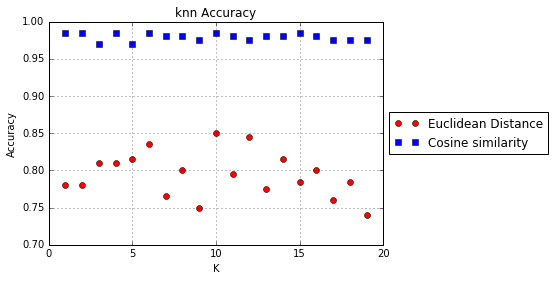

In [14]:
K=list(range(1,20))
plt.plot(K, Accuracy_Euc, 'ro', label='Euclidean Distance')
plt.plot(K, Accuracy_Cos, 'bs', label='Cosine similarity')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('knn Accuracy')
plt.legend(loc='center right')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### 1.d Using Python, modify the training and test data sets so that term weights are converted to TFxIDF weights (instead of raw term frequencies). [See class notes on Text Categorization]. Then, rerun your evaluation on the range of K values (as above) and compare the results to the results without using TFxIDF weights.

In [15]:
### Calculate IDF for Training Set
NDoc = len(df_train[0])
DF = np.array([(df_train!=0).sum(1)]).T ### Calculate DF(Document Frequency)
M = np.ones(np.shape(df_train), dtype = float)*NDoc ### Create a matrix with all entries = NDocs
IDF = np.log2(M/DF)

In [16]:
### IDF for Testing Set (use the same idf from training set)
IDF_train = IDF
IDF_test = IDF[:,0:200]
IDF_test.shape

(5500, 200)

In [17]:
### TF*IDF for Traning and testing set
### Then Transpose the Dataframe and We convert Dataframe into a Numpy
df_IDF_train_trans = np.array((df_train*IDF_train).T)
df_IDF_test_trans = np.array((df_test*IDF_test).T)
print(df_IDF_train_trans.shape, df_IDF_test_trans.shape)

(800, 5500) (200, 5500)


In [18]:
### Euclidean Distance - K(1~19)
Accuracy_Euc = []
for i in range(1,20):
    predicted, id_nearest = knn_search(df_IDF_test_trans,df_IDF_train_trans,labels_train,i,0)
    Accuracy_Euc.append(accuracy(predicted, labels_test ))
### Cosine similarity - K(1~19)
Accuracy_Cos = []
for i in range(1,20):
    predicted, id_nearest = knn_search(df_IDF_test_trans,df_IDF_train_trans,labels_train,i,1)
    Accuracy_Cos.append(accuracy(predicted, labels_test ))

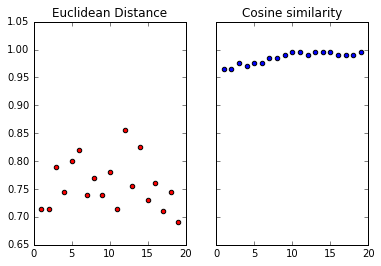

In [19]:
K=list(range(1,20))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.scatter(K, Accuracy_Euc, c = "r")
ax1.set_title('Euclidean Distance')
ax2.scatter(K, Accuracy_Cos, c = "b")
ax2.set_title('Cosine similarity')

#### Euclidean Distance: 
    -The accuracy drops about 5% when TF*IDF transformation is used.

#### Cosine similarity
    -The accuracy is about the same with or without TF*IDF transformation, which is around 97%.

#### 1.e Create a classifier based on the Rocchio Method adapted for text categorization. The training part for the classifier can be implemented as a function that takes as input the training data matrix and the training labels, returning the prototype vectors for each class. The classification part can be implemented as another function that would take as input the prototypes returned from the training function and the instance to be classified. This function should measure Cosine similarity of the test instance to each prototype. Your output should indicate the predicted class for the test instance and the similarity values of the instance to each of the category prototypes. Finally, compute the classification accuracy using the test instances and compare your results to the best KNN approach you tried earlier.

In [20]:
def Rocchio(df,labels):
    ### Calculate TF*IDF 
    NDoc = len(df[0])
    DF = np.array([(df!=0).sum(1)]).T ### Calculate DF(Document Frequency)
    M = np.ones(np.shape(df), dtype = float)*NDoc ### Create a matrix with all entries = NDocs
    IDF = np.log2(M/DF)
    TF_IDF = np.array((df*IDF).T) # Return a doc*term matrix
    
    ### Separate Data by Labels
    ### Use Pandas DataFrame to Generate two DF, then Transform Them Back to Numpy Arrays
    df = pd.DataFrame(TF_IDF)
    D = pd.concat((df,labels),axis=1)
  
    D_Class_One = D[D.iloc[:,-1] == 1]
    D_Class_Two = D[D.iloc[:,-1] == 0]
    D_Class_One = D_Class_One.iloc[:,0:-1].values
    D_Class_Two = D_Class_Two.iloc[:,0:-1].values 
    ### Calculate prototype for Each Class
    Proto_one = D_Class_One.sum(axis=0)
    Proto_two = D_Class_Two.sum(axis=0)
    
    return  Proto_one, Proto_two

In [21]:
### Check the Shape of the Prototype Vectors
Proto_one, Proto_two=Rocchio(df_train,labels_train)
print(Proto_one.shape, Proto_two.shape)

(5500,) (5500,)


In [23]:
def RocchioClassification(test):
    Similarity = [] ### Store the Similarities
    Prediction = [] ### Store the Predictions
    for i in range(len(test)):
        one_norm = np.linalg.norm(Proto_one)
        two_norm = np.linalg.norm(Proto_two)
        test_norm = np.linalg.norm(test[i])
        cs_one = 1 - np.dot(Proto_one,test[i])/(one_norm * test_norm)
        cs_two = 1 - np.dot(Proto_two,test[i])/(two_norm * test_norm)      
        Similarity.append([cs_one, cs_two]) 
        if cs_one > cs_two:
            Prediction.append(0)
        else:
            Prediction.append(1) 
    return Prediction, Similarity   

In [24]:
### Compute the Accuracy 
Prediction, Similarity  = RocchioClassification(df_test_trans)
accu = accuracy(Prediction, labels_test)
print ("The accuray of the Rocchio Classification is: " + str(accu ))

The accuray of the Rocchio Classification is: 0.98


##### Conclusion:
    The accuracy of the Rocchio Method is 0.98, which is close to the results of KNN(Cosine Similarity) classifier and is higher than the results of KNN(Euclidean Distance) classifier.

### 2.Classification using scikit-learn [Dataset: bank_data.csv]

#### 2.a Load and preprocess the data using Numpy or Pandas and the preprocessing functions from scikit-learn. Specifically, you need to separate the target attribute ("pep") from the portion of the data to be used for training and testing. You will need to convert the selected dataset into the Standard Spreadsheet format (scikit-learn functions generally assume that all attributes are in numeric form). Finally, you need to split the transformed data into training and test sets (using 80%-20% randomized split). [Review Ipython Notebook examples from Week 4 for different ways to perform these tasks.]

In [25]:
# Read The File
df=pd.read_csv("bank_data.csv", sep=',')
df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


In [26]:
### Strip the target variable
df_labels=df['pep']
#labels_train = labels_train.map({'YES': 1, 'NO': 0}) ### replace "yes", "no" with 1 and 0
df.drop('pep', axis=1, inplace=True)

In [27]:
### Normalize numeric variables using Min-Max-Scaler
from sklearn import preprocessing
numeric = df[df.columns[1:4]] # get "age", "income" and "children"
min_max_scaler = preprocessing.MinMaxScaler().fit(numeric)
numeric_norm = min_max_scaler.transform(numeric)
numeric_norm = pd.DataFrame(numeric_norm,columns=["age","income","children"])
numeric_norm.head()

,age,income,children
0,0.612245,0.215634,0.333333
1,0.448980,0.431395,1.000000
2,0.673469,0.198933,0.000000
3,0.102041,0.264320,1.000000
4,0.795918,0.783987,0.000000


In [28]:
### Get dummy variables for categorical variables
dummies = pd.get_dummies(df[df.columns[4:]])
dummies.head()

,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [29]:
### Concate numeric_norm and dummies
df_new = pd.concat((numeric_norm,dummies),axis=1)
df_new.head()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
0,0.612245,0.215634,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.448980,0.431395,1.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.673469,0.198933,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.102041,0.264320,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.795918,0.783987,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [30]:
### split the transformed data into training and test sets (using 80%-20% randomized split)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_new, df_labels, test_size=0.2, random_state=33)
print (X_train.shape, X_test.shape)
X_test[0:5]

(480, 19) (120, 19)


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES
456,0.285714,0.142016,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
366,0.836735,0.427640,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
131,0.877551,0.629695,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
448,0.714286,0.756375,1.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
337,0.959184,0.568978,0.333333,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


#### 2.b Run scikit-learn's KNN classifier on the test set. Note: in the case of KNN, you must first normalize the data so that all attributes are in the same scale (normalize so that the values are between 0 and 1). Generate the confusion matrix (visualize it using Matplotlib), as well as the classification report. Also, computing the average accuracy score. Experiment with different values of K and the weight parameter for KNN to see if you can improve accuracy (you do not need to provide the details of all of your experimentation, but provide a short discussion what parameters worked best).

In [31]:
from sklearn import neighbors, tree, naive_bayes
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(X_train, y_train)
knnpreds_test = knnclf.predict(X_test)

In [32]:
### Compute Average Accuracy Score
round(accuracy(knnpreds_test, y_test),2)

0.67

In [33]:
### Generate Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, knnpreds_test))

             precision    recall  f1-score   support

         NO       0.68      0.74      0.71        66
        YES       0.65      0.57      0.61        54

avg / total       0.66      0.67      0.66       120



In [34]:
### Generate Confusion Matrix
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(y_test, knnpreds_test)
print(knncm)

[[49 17]
 [23 31]]


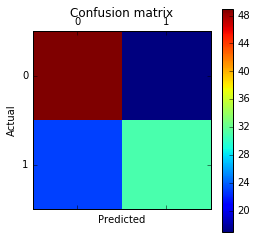

In [35]:
### Plot Confusion Matrix
plt.matshow(knncm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
### K = 0~20, weights = 'distance'
acc_train = []
acc_test = []
for i in range(1,20):
    knnclf = neighbors.KNeighborsClassifier(i, weights='distance')
    knnclf.fit(X_train, y_train)
    knnpreds_train = knnclf.predict(X_train)
    knnpreds_test = knnclf.predict(X_test)
    acc_train.append(accuracy(knnpreds_train, y_train))
    acc_test.append(accuracy(knnpreds_test, y_test))

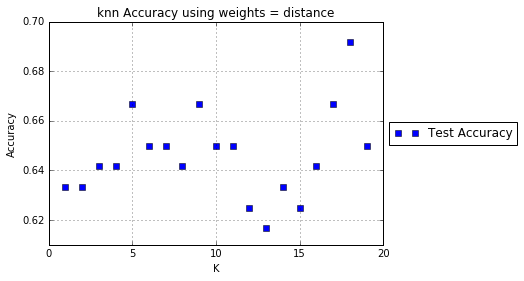

In [37]:
K=list(range(1,20))
#plt.plot(K, acc_train, 'ro', label='Train Accuracy')
plt.plot(K, acc_test, 'bs', label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('knn Accuracy using weights = distance')
plt.legend(loc='center right')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [38]:
### weights = 'uniform' 
acc_train = []
acc_test = []
for i in range(1,20):
    knnclf = neighbors.KNeighborsClassifier(i, weights='uniform')
    knnclf.fit(X_train, y_train)
    knnpreds_train = knnclf.predict(X_train)
    knnpreds_test = knnclf.predict(X_test)
    acc_train.append(accuracy(knnpreds_train, y_train))
    acc_test.append(accuracy(knnpreds_test, y_test))

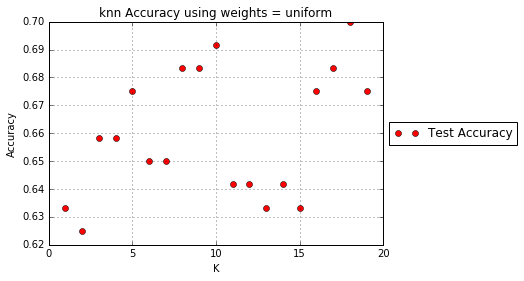

In [39]:
K=list(range(1,20))
#plt.plot(K, acc_train, 'ro', label='Train Accuracy')
plt.plot(K, acc_test, 'ro', label='Test Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('knn Accuracy using weights = uniform')
plt.legend(loc='center right')
plt.grid(True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Conclusion: I tried both "distance" and "uniform" for the weights and different Ks. It turns out the accuracy is highest for both when K = 18. And as we can see form the plot above, the average accuracy is around 66%.

#### 2.c Repeat the classification using scikit-learn's decision tree classifier (using the default parameters) and the naive Bayes (Gaussian) classifier. As above, generate the confusion matrix, classification report, and average accuracy score for each classifier. For each model, compare the average accuracry scores on the test and the training data sets. What does the comparison tell you in terms of bias-variance trade-off?

##### Decision Tree Classifier

In [40]:
DTclf = tree.DecisionTreeClassifier()
DTclf = DTclf.fit(X_train, y_train)
DTpreds_train = DTclf.predict(X_train)
DTpreds_test = DTclf.predict(X_test)

In [41]:
### Compare Accuracy Between Training Set and Testing Set
print ("Training Accuracy is " + str(accuracy(DTpreds_train, y_train)))
print ("Testing Accuracy is " + str(accuracy(DTpreds_test, y_test)))

Training Accuracy is 1.0
Testing Accuracy is 0.8166666666666667


In [42]:
### Generate Classification Report
print(classification_report(y_test, DTpreds_test))

             precision    recall  f1-score   support

         NO       0.81      0.86      0.84        66
        YES       0.82      0.76      0.79        54

avg / total       0.82      0.82      0.82       120



In [43]:
### Generate Confusion Matrix
DTcm = confusion_matrix(y_test, DTpreds_test)
print(DTcm)

[[57  9]
 [13 41]]


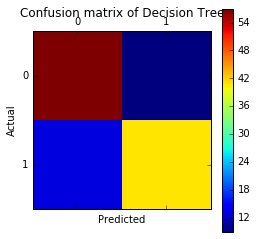

In [44]:
### Plot Confusion Matrix
plt.matshow(DTcm)
plt.title('Confusion matrix of Decision Tree')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Naive Bayes (Gaussian) Classifier

In [45]:
from sklearn.naive_bayes import GaussianNB
NBclf = GaussianNB()
NBclf.fit(X_train, y_train)
NBpreds_train = NBclf.predict(X_train)
NBpreds_test = NBclf.predict(X_test)

In [46]:
### Compare Accuracy Between Training Set and Testing Set
print ("Training Accuracy is " + str(accuracy(NBpreds_train, y_train)))
print ("Testing Accuracy is " + str(accuracy(NBpreds_test , y_test)))

Training Accuracy is 0.6708333333333333
Testing Accuracy is 0.5916666666666667


In [47]:
### Generate Classification Report
print(classification_report(y_test, NBpreds_test))

             precision    recall  f1-score   support

         NO       0.62      0.68      0.65        66
        YES       0.55      0.48      0.51        54

avg / total       0.59      0.59      0.59       120



In [48]:
### Generate Confusion Matrix
NBcm = confusion_matrix(y_test, NBpreds_test)
print(NBcm)

[[45 21]
 [28 26]]


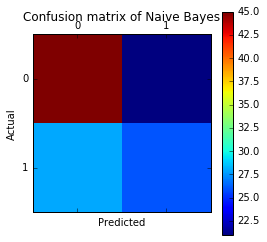

In [49]:
### Plot Confusion Matrix
plt.matshow(NBcm)
plt.title('Confusion matrix of Naive Bayes')
plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

##### Conclusion: 
            The decision tree model is of high variance as it's a greedy algorithm that the training accuracy is equal to 100%. The testing accuracy is around 82.5%, which is reasonably high. So I will suggest to add more data or simplify the model a little bid to see if I can acquire a better accuracy.
            The NB model is of high bias as its training accuracy and testing accuracy are very close and relatively low. I will suggest to use more features or use more complex models(more parameters).

#### 2.d Discuss your observations based on the above experiments.

    First, the decision tree model scored highest (without tuning parameters for each model). I believe the reason is the data has more categorical variables than numerical ones. But I think I need to check the problem of overfitting using cross-validation.
    Second, the KNN model has an average accuracy around 67%, about 15% lower than the decision tree model. I think the result will be improved once I add some complexity to it as KNN itself is a lazy learner.
    Last, the NB model scored poorly, which is only 59%. 

### 3. Data Analysis and Predictive Modeling on Census data [Dataset: adult-modified.csv]
    For this problem you will use a simplified version of the Adult Census Data Set. In the subset provided here, some of the attributes have been removed and some preprocessing has been performed.Your tasks in this problem are the following:

#### 3.a 
    i.Examine the data for missing values. In case of categorical attributes, remove instances with missing values. In the case of numeric attributes, impute and fill-in the missing values using the attribute mean.

In [50]:
### Read The File
### Use na_values='?' to catch all missing values
df=pd.read_csv("adult-modified.csv", sep=',', na_values='?') 
df.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39.0,Public,13,Single,White,Male,40,<=50K
1,50.0,Self-emp,13,Married,White,Male,13,<=50K
2,38.0,Private,9,Single,White,Male,40,<=50K
3,53.0,Private,7,Married,Black,Male,40,<=50K
4,28.0,Private,13,Married,Black,Female,40,<=50K


In [51]:
### Check Missing Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               9802 non-null float64
workclass         9412 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [52]:
### Fill in Missing Values for Age
df.age.fillna(df.age.mean(), axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
age               10000 non-null float64
workclass         9412 non-null object
education         10000 non-null int64
marital-status    10000 non-null object
race              10000 non-null object
sex               10000 non-null object
hours-per-week    10000 non-null int64
income            10000 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [53]:
### Removing Instances with NULL Values in "workclass"
df.dropna(axis=0, inplace=True)
df.shape

(9412, 8)


    ii. Examine the characteristics of the attributes, including relevant statistics for each attribute, histograms illustrating the distribtions of numeric attributes, bar graphs showing value counts for categorical attributes, etc.

In [54]:
### Statistics for Numerical Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
age               9412 non-null float64
workclass         9412 non-null object
education         9412 non-null int64
marital-status    9412 non-null object
race              9412 non-null object
sex               9412 non-null object
hours-per-week    9412 non-null int64
income            9412 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


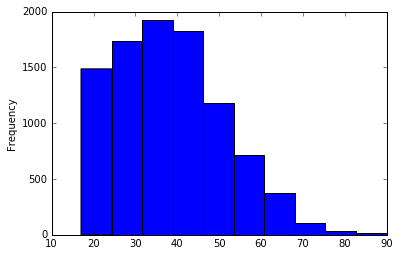

In [55]:
### Age Distribution
df["age"].plot(kind="hist")

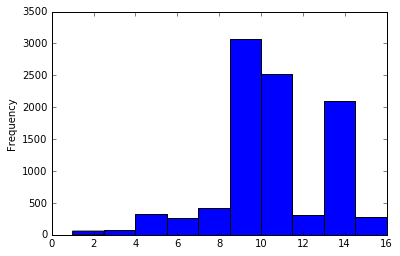

In [56]:
### Education Distribution
df["education"].plot(kind="hist")

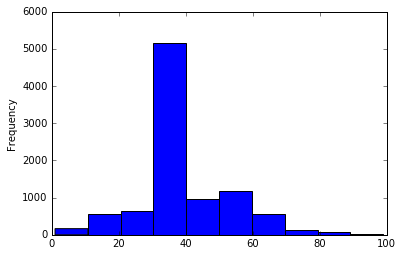

In [57]:
### hours-per-week Distribution
df["hours-per-week"].plot(kind="hist")

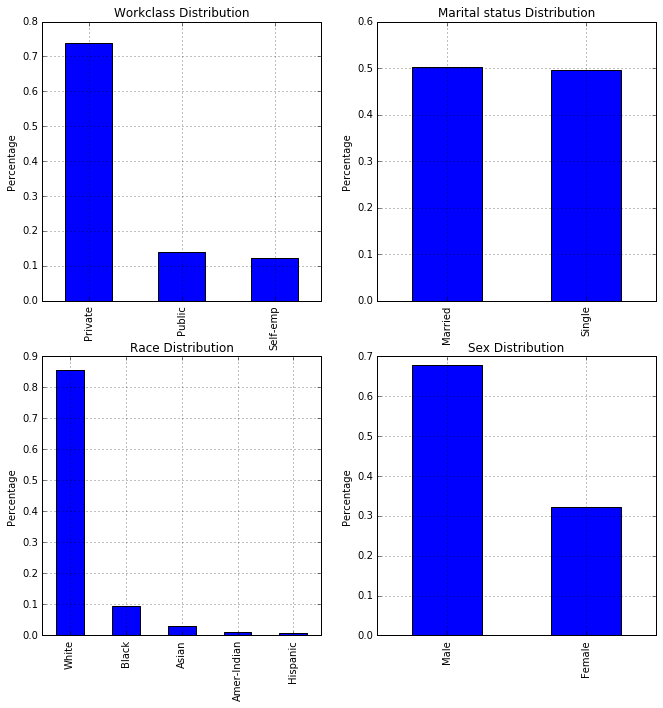

In [58]:
### Show the distributions of values for categorical attributes

workclass = df["workclass"].value_counts()/df["workclass"].count()
marital_status = df["marital-status"].value_counts()/df["marital-status"].count()
race = df["race"].value_counts()/df["race"].count()
sex = df["sex"].value_counts()/df["sex"].count()

fig = plt.figure(figsize=(11,11))
ax1 = fig.add_subplot(221)
#ax1.set_xlabel('Workclass')
ax1.set_ylabel('Percentage')
ax1.set_title("Workclass Distribution")
workclass.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(222)
#ax1.set_xlabel('Marital status')
ax1.set_ylabel('Percentage')
ax1.set_title("Marital status Distribution")
marital_status.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(223)
#ax1.set_xlabel('Race')
ax1.set_ylabel('Percentage')
ax1.set_title("Race Distribution")
race.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(224)
#ax1.set_xlabel('Sex')
ax1.set_ylabel('Percentage')
ax1.set_title("Sex Distribution")
sex.plot(kind='bar', grid = True)

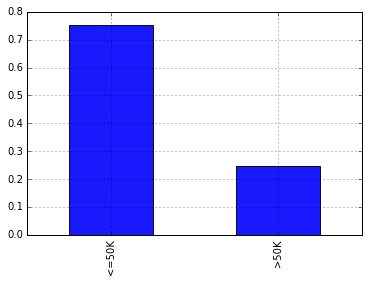

In [59]:
### Distribution of the Target Variable
income = df["income"].value_counts()/df["income"].count()
income.plot(kind='bar', grid = True, alpha=0.9)


    iii. Perform the following cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income. In the latter case (race+income) also create a table or chart showing percentages of each race category that fall in the low-income group. Discuss your observations from this analysis.

###### Education+Race 

In [60]:
df[["education","race"]].groupby("race").describe()

education
race                          
Amer-Indian count    92.000000
            mean      9.119565
            std       2.026432
            min       4.000000
            25%       9.000000
            50%       9.000000
            75%      10.000000
            max      13.000000
Asian       count   291.000000
            mean     10.941581
            std       2.712682
            min       2.000000
            25%       9.000000
            50%      10.000000
            75%      13.000000
            max      16.000000
Black       count   892.000000
            mean      9.582960
            std       2.226476
            min       1.000000
            25%       9.000000
            50%       9.000000
            75%      10.000000
            max      16.000000
Hispanic    count    75.000000
            mean      8.853333
            std       3.069877
            min       2.000000
            25%       7.000000
            50%       9.000000
            75%      10.000000
            max      15.000000
White       count  8062.000000
            mean     10.179112
            std       2.552060
            min       1.000000
            25%       9.000000
            50%      10.000000
            75%      13.000000
            max      16.000000

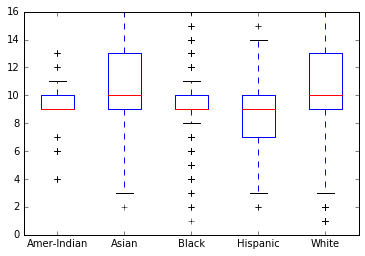

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

x1 = df[["education","race"]][df["race"]=="Amer-Indian"]["education"]
x2 = df[["education","race"]][df["race"]=="Asian"]["education"]
x3 = df[["education","race"]][df["race"]=="Black"]["education"]
x4 = df[["education","race"]][df["race"]=="Hispanic"]["education"]
x5 = df[["education","race"]][df["race"]=="White"]["education"]

names = ["Amer-Indian","Asian","Black","Hispanic","White"]
ax.boxplot([x1,x2,x3,x4,x5], labels = names)
plt.show()

###### work-class+income

In [62]:
pd.crosstab(df["workclass"], df["income"])

income,<=50K,>50K
workclass,,
Private,5443,1504
Public,925,392
Self-emp,725,423


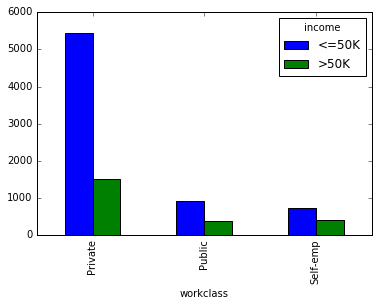

In [63]:
pd.crosstab(df["workclass"], df["income"]).plot(kind="bar")

#####  work-class+race

In [64]:
pd.crosstab(df["workclass"], df["race"])

race,Amer-Indian,Asian,Black,Hispanic,White
workclass,,,,,
Private,65,204,664,64,5950
Public,20,48,192,5,1052
Self-emp,7,39,36,6,1060


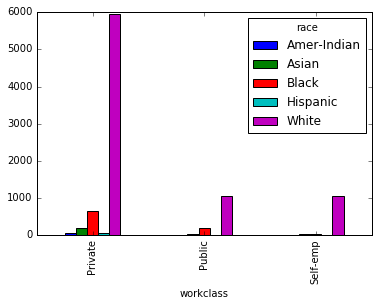

In [65]:
pd.crosstab(df["workclass"], df["race"]).plot(kind="bar")

##### race+income

In [66]:
pd.crosstab(df["income"], df["race"])

race,Amer-Indian,Asian,Black,Hispanic,White
income,,,,,
<=50K,83,224,773,69,5944
>50K,9,67,119,6,2118


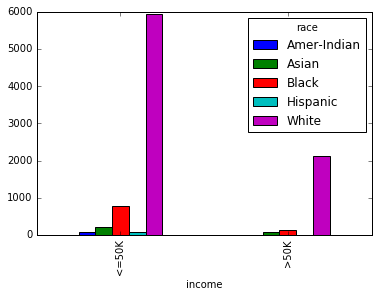

In [67]:
pd.crosstab(df["income"], df["race"]).plot(kind="bar")

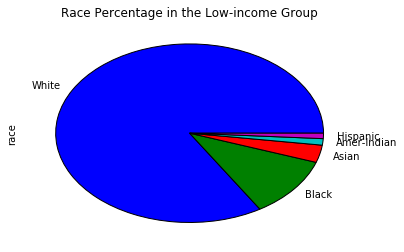

In [68]:
race_income = df[df["income"]=="<=50K"]["race"].value_counts() / df[df["income"]=="<=50K"]["race"].count()
race_income.plot(kind="pie",title ="Race Percentage in the Low-income Group")

##### Conclusion:
    The race group is inbalanced as the number of white people is very large. That's why white people dominate several plots above.
    White and Asian have the highest education level, followed by Ame-Indian, Black and Hispanic.
    
    


iv. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. 

In [69]:
df.groupby("income").describe()

age    education  hours-per-week
income                                                
<=50K  count  7093.000000  7093.000000     7093.000000
       mean     36.644604     9.646976       39.567038
       std      13.340142     2.397358       11.868506
       min      17.000000     1.000000        1.000000
       25%      26.000000     9.000000       38.000000
       50%      35.000000     9.000000       40.000000
       75%      45.000000    10.000000       40.000000
       max      90.000000    16.000000       99.000000
>50K   count  2319.000000  2319.000000     2319.000000
       mean     43.632531    11.588185       45.708495
       std      10.042135     2.410764       10.678794
       min      19.000000     2.000000        1.000000
       25%      36.000000     9.000000       40.000000
       50%      43.000000    12.000000       40.000000
       75%      50.000000    13.000000       50.000000
       max      90.000000    16.000000       99.000000

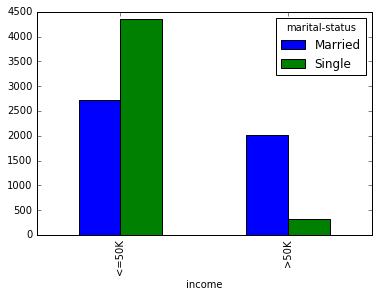

In [70]:
pd.crosstab(df["income"], df["marital-status"]).plot(kind="bar")

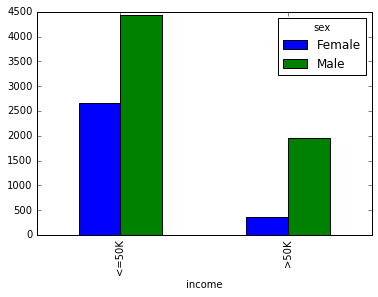

In [71]:
pd.crosstab(df["income"], df["sex"]).plot(kind="bar")

##### Conclusion:
    70% people fall into the low income class and the rest 30% fall into the high income class.
    The high income class, in general, is older, more educated and of more working hours per week.
    Most of the high income class are married, while most are signle in the low income class.
    Male dominates the high income class.


#### 3.b Predictive Modeling and Model Evaluation:


i. Using either Pandas or Scikit-learn, create dummy variables for the categorical attributes. Then separate the target attribute ("income_>50K") from the attributes used for training. [Note: you need to drop "income_<=50K" which is also created as a dummy variable in earlier steps).

In [72]:
dummies = pd.get_dummies(df, columns = ["workclass","marital-status", "race","sex", "income"])
target = dummies["income_>50K"]
dummies.drop(["income_<=50K","income_>50K"],axis =1, inplace=True)
dummies.columns

Index(['age', 'education', 'hours-per-week', 'workclass_Private',
       'workclass_Public', 'workclass_Self-emp', 'marital-status_Married',
       'marital-status_Single', 'race_Amer-Indian', 'race_Asian', 'race_Black',
       'race_Hispanic', 'race_White', 'sex_Female', 'sex_Male'],
      dtype='object')


ii. Use scikit-learn to build classifiers uisng Naive Bayes (Gaussian), decision tree (using "entropy" as selection criteria), and linear discriminant analysis (LDA). For each of these perform 10-fold cross-validation (using cross-validation module in scikit-learn) and report the overall average accuracy. 

Naive Bayes (Gaussian)

In [73]:
from sklearn import cross_validation
from sklearn import naive_bayes, tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
nbclf = naive_bayes.GaussianNB()
cv_nb = cross_validation.cross_val_score(nbclf, dummies, target, cv=10)
print("Overall Accuracy of Naive Bayes (Gaussian): %0.2f (+/- %0.2f)" % (cv_nb.mean(), cv_nb.std() * 2))

Overall Accuracy of Naive Bayes (Gaussian): 0.72 (+/- 0.02)


linear discriminant analysis (LDA)

In [74]:
ldclf = LinearDiscriminantAnalysis()
cv_ld = cross_validation.cross_val_score(ldclf, dummies, target, cv=10)
print("Overall Accuracy of LDA: %0.2f (+/- %0.2f)" % (cv_ld.mean(), cv_ld.std() * 2))

Overall Accuracy of LDA: 0.81 (+/- 0.02)


C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\WYAO2\AppData\Local\Continuum\Anaconda3\lib\site-package

Decision Tree

In [75]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=20, max_depth= 5)
cv_tr = cross_validation.cross_val_score(treeclf, dummies, target, cv=10)
print("Overall Accuracy of Decision Tree: %0.2f (+/- %0.2f)" % (cv_tr.mean(), cv_tr.std() * 2))

Overall Accuracy of Decision Tree: 0.82 (+/- 0.02)


iii. [Extra Credit] For the decision tree model (generated on the full training data), generate a visualization of tree and submit it as a separate file (png, jpg, or pdf).

In [76]:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

In [77]:
import pydot
import pydotplus # Use pydotplus for Python 3

In [78]:
treeclf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=20, max_depth= 5)
treeclf.fit(dummies, target) 
tree.export_graphviz(treeclf,out_file='tree.dot',feature_names=list(dummies.columns))  

In [79]:
dot_data = StringIO()
tree.export_graphviz(treeclf, out_file=dot_data, feature_names=list(dummies.columns))  
graph= pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png("vs_tree.png")

True

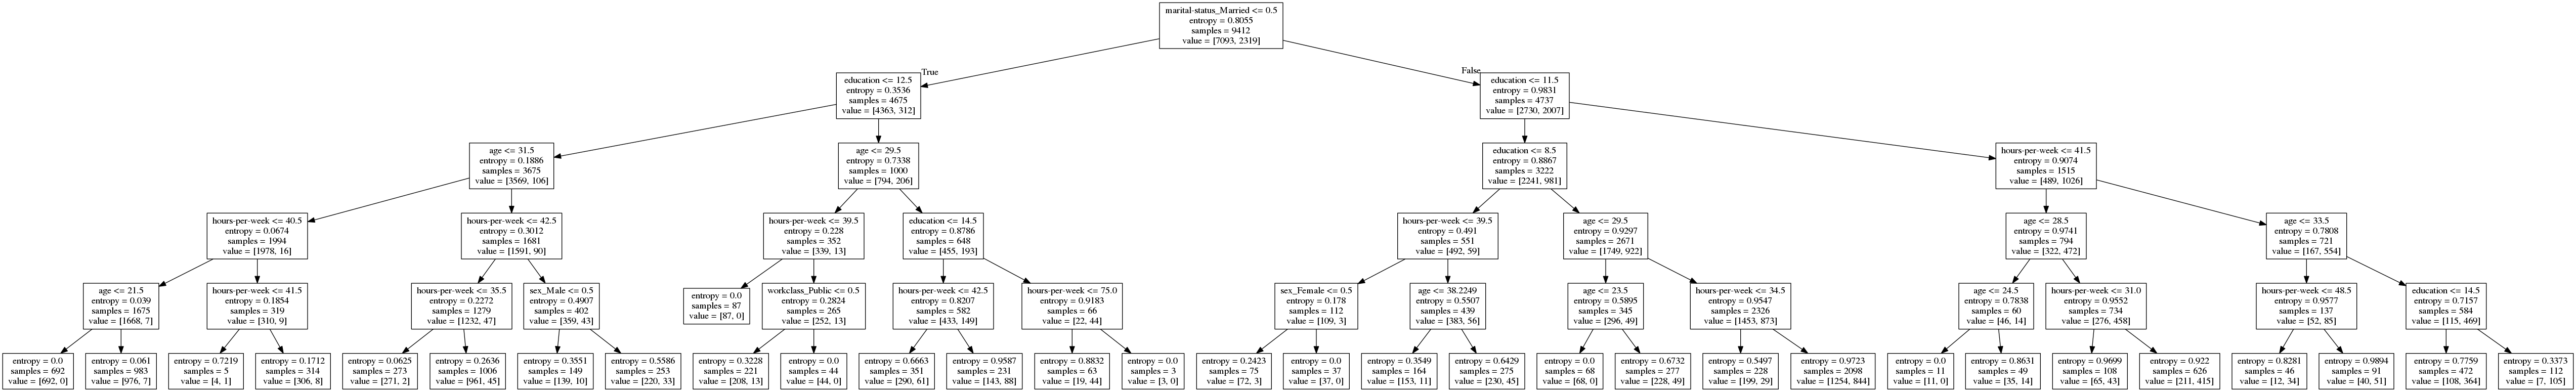

In [80]:
from IPython.display import Image
Image(filename='vs_tree.png')